In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict



In [3]:
# 设置参数
def generate_MDP(num_non_terminal_states = 50,num_actions = 100, min_available_states = 20):
    # 至少20个可到达状态（包括当前状态和TAU）
    #output dataframe as transitional MDP
    terminal_state = 'Tau'
    np.random.seed(42)

    # 创建非终止状态列表（不包含TAU）
    states = [f'S{i}' for i in range(1, num_non_terminal_states + 1)]
    all_states = states + [terminal_state]  # 所有可能的状态

    # 初始化DataFrame（行：actions，列：states），单元格类型为object以存储字典
    df = pd.DataFrame(index=[f'A{i}' for i in range(1, num_actions + 1)], 
                      columns=states, dtype=object)

    # 为每个(action, state)生成转移概率
    for action in df.index:
        for state in df.columns:
            # 可到达状态 = 当前state + TAU + 至少18个其他随机state（确保总数 >= 20）
            other_states = [s for s in states if s != state]  # 排除当前state（后面再加回来）
            num_additional = max(min_available_states - 2, 0)  # 至少再选18个（因为已经包含state和TAU）
            additional_states = np.random.choice(
                other_states,
                size=np.random.randint(num_additional, len(other_states)),
                replace=False
            )
            
            # 最终可到达状态 = {当前state, TAU} + 其他随机states
            available_states = [state, terminal_state] + list(additional_states)
            
            # 生成概率分布（Dirichlet分布确保归一化）
            probs = np.random.dirichlet(np.ones(len(available_states)))
            
            # 构建完整的转移字典，包含所有state
            transition_dict = {}
            for s in all_states:
                if s in available_states:
                    # 获取对应的概率值（转换为float确保类型）
                    idx = available_states.index(s)
                    transition_dict[s] = float(probs[idx])
                else:
                    # 不可达的state概率设为0
                    transition_dict[s] = 0.0
            
            # 存储到DataFrame
            df.at[action, state] = transition_dict
    
    df.to_csv("generated_MDP.csv", index=True)

    return df 



In [4]:
mdp = generate_MDP()

In [5]:
mdp['S1']['A1'],len(mdp['S1']['A1'])

({'S1': 0.020118713037846483,
  'S2': 0.0,
  'S3': 0.0,
  'S4': 0.0,
  'S5': 0.0246887030567333,
  'S6': 0.034658830580721764,
  'S7': 0.0,
  'S8': 0.020778495715782327,
  'S9': 0.0,
  'S10': 0.07633061547475127,
  'S11': 0.030405082449488,
  'S12': 0.0,
  'S13': 0.0,
  'S14': 0.00963430171783552,
  'S15': 0.010849582164190985,
  'S16': 0.0,
  'S17': 0.03492195754212289,
  'S18': 0.13425745929987887,
  'S19': 0.0740148246298174,
  'S20': 0.0,
  'S21': 0.02288129342869483,
  'S22': 0.0,
  'S23': 0.0,
  'S24': 0.0,
  'S25': 0.0,
  'S26': 0.07692420410043413,
  'S27': 0.008314354434097452,
  'S28': 0.020500003850864472,
  'S29': 0.0,
  'S30': 0.0,
  'S31': 0.0,
  'S32': 0.047513737586738686,
  'S33': 0.0,
  'S34': 0.05818816963844356,
  'S35': 0.0,
  'S36': 0.0568515747306824,
  'S37': 0.0,
  'S38': 0.0,
  'S39': 0.0013147979722150638,
  'S40': 0.0,
  'S41': 0.011397619454961474,
  'S42': 0.0,
  'S43': 0.10797390115957108,
  'S44': 0.0,
  'S45': 0.0,
  'S46': 0.0,
  'S47': 0.0389140750939

In [6]:
# 设置参数
num_non_terminal_states = 50
num_actions = 100
terminal_state = 'Tau'

# 生成 Action Reward {action: reward} (范围: [-5, +5])
action_rewards = {
    f'A{i}': np.random.uniform(-5, 0)  # 均匀分布
    for i in range(1, num_actions + 1)
}

# 生成 State Reward {state: reward} (非终止状态: [-5, 0], TAU: +50)
state_rewards = {
    f'S{i}': np.random.uniform(-5, 0)  # 非终止状态
    for i in range(1, num_non_terminal_states + 1)
}
state_rewards[terminal_state] = 10  # 终止状态固定奖励

# 转换为DataFrame并保存CSV
action_reward_df = pd.DataFrame.from_dict(action_rewards, orient='index', columns=['reward'])
action_reward_df.to_csv("action_rewards.csv", index_label="action")

state_reward_df = pd.DataFrame.from_dict(state_rewards, orient='index', columns=['reward'])
state_reward_df.to_csv("state_rewards.csv", index_label="state")

# 打印结果示例
print("Action Rewards (示例):")
print(action_reward_df.head())
print("\nState Rewards (示例 + TAU):")
print(state_reward_df.loc[['S1', 'S2', terminal_state]])


Action Rewards (示例):
      reward
A1 -1.031674
A2 -1.814154
A3 -4.077160
A4 -0.684656
A5 -4.705764

State Rewards (示例 + TAU):
        reward
S1   -1.260632
S2   -2.753437
Tau  10.000000


In [7]:
stateseverity = pd.read_csv('action_rewards.csv')
actionreward = pd.read_csv('state_rewards.csv',index_col=0)

In [8]:
action_rewards_df = pd.read_csv(
    "action_rewards.csv" ,        # 不读取表头
)

# 转为字典 {action: reward}
action_rewards_dict = dict(zip(action_rewards_df["action"], action_rewards_df["reward"]))
                           

In [9]:
action_rewards_dict.values()

dict_values([-1.0316739622272526, -1.8141543526976984, -4.077160474041995, -0.6846560455337389, -4.705763867343597, -0.3246217580487149, -0.4798376872125214, -3.963872090105715, -3.850614142572727, -4.718095538685743, -0.8927843347230402, -2.6083237765910647, -3.003639186449338, -2.4116790481983057, -4.344169595794746, -3.846554640136036, -0.5312893539763142, -0.4107451905112738, -4.662141563420096, -2.476779897648595, -0.8894470764900104, -1.14473600385188, -1.6243200748370716, -4.345920599727679, -1.3242764397359528, -3.695673210481654, -0.541796974797851, -4.524416510789491, -4.759023748478174, -3.275126492925996, -0.7769820486214476, -4.957675743518884, -3.1695538468845474, -1.3543533152797154, -1.6869835103915012, -2.41814653892237, -4.466186671937004, -4.749689139537829, -4.881210835702036, -2.073520486278033, -1.5446753236557598, -0.4522467641095495, -4.434165097427626, -1.117799999898505, -4.14928880768519, -2.844137479432221, -3.7206473860780536, -1.2337307331175331, -0.438548

In [1]:
import syn_env
from syn_env import GeneratedENV

In [2]:
generEnv = GeneratedENV()

/Users/veetin/Desktop/drifttest_pa/main/syn_env.py:62: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  frequencies[label][action] = ast.literal_eval(frequencies[label][action]) #判断需要计算的内容是不是合法的Python类型，如果是则执行，否则就报错


In [3]:
generEnv.motions

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A38',
 'A39',
 'A40',
 'A41',
 'A42',
 'A43',
 'A44',
 'A45',
 'A46',
 'A47',
 'A48',
 'A49',
 'A50',
 'A51',
 'A52',
 'A53',
 'A54',
 'A55',
 'A56',
 'A57',
 'A58',
 'A59',
 'A60',
 'A61',
 'A62',
 'A63',
 'A64',
 'A65',
 'A66',
 'A67',
 'A68',
 'A69',
 'A70',
 'A71',
 'A72',
 'A73',
 'A74',
 'A75',
 'A76',
 'A77',
 'A78',
 'A79',
 'A80',
 'A81',
 'A82',
 'A83',
 'A84',
 'A85',
 'A86',
 'A87',
 'A88',
 'A89',
 'A90',
 'A91',
 'A92',
 'A93',
 'A94',
 'A95',
 'A96',
 'A97',
 'A98',
 'A99',
 'A100']

In [4]:
generEnv.states

['S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S50',
 'Tau']

In [5]:
generEnv.observation_space

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50
A1,"{'S1': 0.04435433237302894, 'TAU': 0.049320243...","{'S2': 0.002009917624988225, 'TAU': 0.03059363...","{'S3': 0.051255997443545, 'TAU': 0.01205944229...","{'S4': 0.06477028924507396, 'TAU': 0.012452930...","{'S5': 0.030474803803949586, 'TAU': 0.05187541...","{'S6': 0.007703141635523409, 'TAU': 0.00600369...","{'S7': 0.002023851510690129, 'TAU': 0.11292346...","{'S8': 0.09302259678126995, 'TAU': 0.029927444...","{'S9': 0.03549546425322201, 'TAU': 0.000263754...","{'S10': 0.009356831161371744, 'TAU': 0.0002574...",...,"{'S41': 0.023822943817098197, 'TAU': 0.0463574...","{'S42': 0.006334854889085722, 'TAU': 0.0256705...","{'S43': 0.050897174898863855, 'TAU': 0.0029098...","{'S44': 0.04221382677411126, 'TAU': 0.08247711...","{'S45': 0.06497752815228436, 'TAU': 0.00061740...","{'S46': 0.002312750800100445, 'TAU': 0.0048915...","{'S47': 0.02075555581728186, 'TAU': 0.05584424...","{'S48': 0.04142828434634389, 'TAU': 0.03059927...","{'S49': 0.08602363363674558, 'TAU': 0.02490262...","{'S50': 0.10263962066898111, 'TAU': 0.04823955..."
A2,"{'S1': 0.07360220420635924, 'TAU': 0.002187190...","{'S2': 0.04422737603045517, 'TAU': 0.075040753...","{'S3': 0.07341981287612924, 'TAU': 0.028151018...","{'S4': 0.03242664141673576, 'TAU': 0.036799504...","{'S5': 0.03453292870674598, 'TAU': 0.000697435...","{'S6': 0.0030822648775774963, 'TAU': 0.0370381...","{'S7': 0.009255403775584543, 'TAU': 0.04884786...","{'S8': 0.036544704387111195, 'TAU': 0.02992965...","{'S9': 0.03150093294005707, 'TAU': 0.000464525...","{'S10': 0.00010988442473676658, 'TAU': 0.00161...",...,"{'S41': 0.021630044506292547, 'TAU': 0.0369265...","{'S42': 0.0076142386117805435, 'TAU': 0.005728...","{'S43': 0.01969704855408464, 'TAU': 0.03993068...","{'S44': 0.10301449918270557, 'TAU': 0.00846771...","{'S45': 0.11017417753755915, 'TAU': 0.14509328...","{'S46': 0.0025753502822798585, 'TAU': 0.050076...","{'S47': 0.0031351155358406435, 'TAU': 0.104214...","{'S48': 0.04378358195157937, 'TAU': 0.04677002...","{'S49': 0.007575379930768079, 'TAU': 0.0436466...","{'S50': 0.0016191944140932855, 'TAU': 0.016908..."
A3,"{'S1': 0.037478434027967925, 'TAU': 0.08745244...","{'S2': 0.02535943065292403, 'TAU': 0.004190978...","{'S3': 0.04989595903684863, 'TAU': 0.016190945...","{'S4': 0.01376574084650935, 'TAU': 0.067865086...","{'S5': 0.0067075108706138005, 'TAU': 0.0171989...","{'S6': 0.005283356336296912, 'TAU': 0.06739516...","{'S7': 0.019931463891384962, 'TAU': 0.07354007...","{'S8': 0.009146069642357313, 'TAU': 0.00851072...","{'S9': 0.021548090526809754, 'TAU': 0.01002216...","{'S10': 0.028733950626023696, 'TAU': 0.0124457...",...,"{'S41': 0.02267057723790023, 'TAU': 0.00833240...","{'S42': 0.008839875026862705, 'TAU': 0.0156000...","{'S43': 0.010807326129027676, 'TAU': 0.0714377...","{'S44': 0.05985789363065357, 'TAU': 0.00821143...","{'S45': 0.007930674843024274, 'TAU': 0.0191725...","{'S46': 0.020895063826315192, 'TAU': 0.0164191...","{'S47': 0.006343615154212426, 'TAU': 0.0564384...","{'S48': 0.02094440818570442, 'TAU': 0.01895369...","{'S49': 0.03309553394731062, 'TAU': 0.02737555...","{'S50': 0.0826387417284602, 'TAU': 0.062056144..."
A4,"{'S1': 0.005883283291899366, 'TAU': 0.01483081...","{'S2': 0.04091051707857156, 'TAU': 0.024779573...","{'S3': 0.02407678296278932, 'TAU': 0.011681716...","{'S4': 0.0473156954660564, 'TAU': 0.0010728899...","{'S5': 0.03992703337614012, 'TAU': 0.028556449...","{'S6': 0.037643086059313796, 'TAU': 0.01096537...","{'S7': 0.09237622999967465, 'TAU': 0.017601481...","{'S8': 0.010873385693043804, 'TAU': 0.00676970...","{'S9': 0.002266516311427163, 'TAU': 0.01202383...","{'S10': 0.0035382279876776867, 'TAU': 0.093291...",...,"{'S41': 0.003841408591055147, 'TAU': 0.1254896...","{'S42': 0.004067222947616607, 'TAU': 0.1105989...","{'S43': 0.09670721086267868, 'TAU': 0.21065751...","{'S44': 0.009948440186622678, 'TAU': 0.0356261...","{'S45': 0.035519105392457596, 'TAU': 0.0263246.

In [2]:
import pandas as pd
import numpy as np

# 定义状态（不包括terminal_state作为单独列）
phases = ['S1', 'S2', 'S3', 'S4']
states = [f'{phase}_{i}' for phase in phases for i in range(1, 6)]  # 20个状态

# 定义动作 - 每个阶段5个专属动作 + 20个全局动作
phase_actions = {phase: [f'A_{phase}_{i}' for i in range(1, 6)] for phase in phases}
global_actions = [f'Global_A_{i}' for i in range(1, 21)]
all_actions = sum(phase_actions.values(), []) + global_actions  # 40个动作

# 创建空的MDP DataFrame，并确保单元格可以存储字典
mdp = pd.DataFrame(index=all_actions, columns=states)
for col in mdp.columns:
    mdp[col] = mdp[col].astype(object)  # 将列类型转为object以存储字典

# 初始化所有单元格为空字典
for action in all_actions:
    for state in states:
        mdp.at[action, state] = {}  # 使用at进行单个单元格赋值

# 填充转移概率
for phase in phases:
    current_phase_states = [f'{phase}_{i}' for i in range(1, 6)]
    
    # 确定下一状态
    if phase != 'S4':
        next_phase_states = [f'{phases[phases.index(phase)+1]}_{i}' for i in range(1, 6)]
    else:
        next_phase_states = ['Tau']  # S4阶段的主要目标是转移到Tau
    
    # 处理阶段专属动作
    for action in phase_actions[phase]:
        for state in current_phase_states:
            if phase != 'S4':
                # 非S4阶段：可以停留在当前阶段或转移到下一阶段
                stay_prob = np.random.uniform(0.1, 0.5)
                move_probs = np.random.dirichlet(np.ones(len(next_phase_states)), size=1)[0] * (1 - stay_prob)
                trans_dict = {state: stay_prob}
                for next_state, prob in zip(next_phase_states, move_probs):
                    trans_dict[next_state] = prob
            else:
                # S4阶段：高概率转移到Tau，低概率转移到其他S4状态
                tau_prob = np.random.uniform(0.8, 0.9)  # 80%~90%概率到Tau
                other_s4_probs = np.random.dirichlet(np.ones(4), size=1)[0] * (1 - tau_prob)  # 剩余概率分配到其他S4状态
                trans_dict = {'Tau': tau_prob}
                other_s4_states = [s for s in current_phase_states if s != state]  # 不包含自己
                for next_state, prob in zip(other_s4_states, other_s4_probs):
                    trans_dict[next_state] = prob
            
            mdp.at[action, state] = trans_dict  # 使用at赋值
    
    # 处理全局动作（逻辑类似，但在所有阶段都有效）
    for action in global_actions:
        for state in states:
            if phase in state:  # 当前状态属于这个阶段
                if phase != 'S4':
                    # 非S4阶段：可以停留在当前阶段或转移到下一阶段
                    stay_prob = np.random.uniform(0.1, 0.5)
                    move_probs = np.random.dirichlet(np.ones(len(next_phase_states)), size=1)[0] * (1 - stay_prob)
                    trans_dict = {state: stay_prob}
                    for next_state, prob in zip(next_phase_states, move_probs):
                        trans_dict[next_state] = prob
                else:
                    # S4阶段：高概率转移到Tau，低概率转移到其他S4状态
                    tau_prob = np.random.uniform(0.8, 0.9)
                    other_s4_probs = np.random.dirichlet(np.ones(4), size=1)[0] * (1 - tau_prob)
                    trans_dict = {'Tau': tau_prob}
                    other_s4_states = [s for s in current_phase_states if s != state]
                    for next_state, prob in zip(other_s4_states, other_s4_probs):
                        trans_dict[next_state] = prob
                
                mdp.at[action, state] = trans_dict  # 使用at赋值

# 检查S4阶段的转移概率示例
print("S4_1的专属动作A_S4_1的转移概率:")
print(mdp.loc['A_S4_1', 'S4_1'])
print("\nS4_3的全局动作Global_A_1的转移概率:")
print(mdp.loc['Global_A_1', 'S4_3'])
print("\nDataFrame shape:", mdp.shape)  # (40, 20)

S4_1的专属动作A_S4_1的转移概率:
{'Tau': 0.8042512582783968, 'S4_2': 0.011132051039277256, 'S4_3': 0.08474109020383098, 'S4_4': 0.05755003259211714, 'S4_5': 0.04232556788637779}

S4_3的全局动作Global_A_1的转移概率:
{'Tau': 0.8523800692536103, 'S4_1': 0.011315836385354888, 'S4_2': 0.04797446527843644, 'S4_4': 0.0047284559674642375, 'S4_5': 0.08360117311513413}

DataFrame shape: (40, 20)


In [3]:
mdp

,S1_1,S1_2,S1_3,S1_4,S1_5,S2_1,S2_2,S2_3,S2_4,S2_5,S3_1,S3_2,S3_3,S3_4,S3_5,S4_1,S4_2,S4_3,S4_4,S4_5
A_S1_1,"{'S1_1': 0.3860458402679431, 'S2_1': 0.2318893...","{'S1_2': 0.44043004959645293, 'S2_1': 0.115066...","{'S1_3': 0.10923534242391209, 'S2_1': 0.004659...","{'S1_4': 0.21367014734861156, 'S2_1': 0.104694...","{'S1_5': 0.20701281809606056, 'S2_1': 0.195405...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
A_S1_2,"{'S1_1': 0.17451363305435208, 'S2_1': 0.253958...","{'S1_2': 0.37554111345196584, 'S2_1': 0.035114...","{'S1_3': 0.3971295263707998, 'S2_1': 0.0550145...","{'S1_4': 0.17994679627889887, 'S2_1': 0.021650...","{'S1_5': 0.11208666531972461, 'S2_1': 0.172976...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
A_S1_3,"{'S1_1': 0.39187540821314315, 'S2_1': 0.340565...","{'S1_2': 0.3112536840490947, 'S2_1': 0.0111059...","{'S1_3': 0.25044070340898905, 'S2_1': 0.057244...","{'S1_4': 0.1037934564726101, 'S2_1': 0.4535489...","{'S1_5': 0.29971812745538984, 'S2_1': 0.374945...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
A_S1_4,"{'S1_1': 0.4261708637099555, 'S2_1': 0.0373035...","{'S1_2': 0.2944123822088819, 'S2_1': 0.2901223...","{'S1_3': 0.3377627538599288, 'S2_1': 0.0769057...","{'S1_4': 0.11825291049342002, 'S2_1': 0.224060...","{'S1_5': 0.4312185642576154, 'S2_1': 0.1533144...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
A_S1_5,"{'S1_1': 0.33800272696994227, 'S2_1': 0.238712...","{'S1_2': 0.4221899425239125, 'S2_1': 0.0130958...","{'S1_3': 0.47112913870142314, 'S2_1': 0.107590...","{'S1_4': 0.23725500246797282, 'S2_1': 0.222575...","{'S1_5': 0.3243763205111061, 'S2_1': 0.0146877...",{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
A_S2_1,{},{},{},{},{},"{'S2_1': 0.49489665068952715, 'S3_1': 0.001562...","{'S2_2': 0.2782247935067353, 'S3_1': 0.2605783...","{'S2_3': 0.4329564140440072, 'S3_1': 0.0541638...","{'S2_4': 0.48416643002085746, 'S3_1': 0.147910...","{'S2_5': 0.4087525608803487, 'S3_1': 0.1177976...",{},{},{},{},{},{},{},{},{},{}
A_S2_2,{},{},{},{},{},"{'S2_1': 0.37943370186204184, 'S3_1': 0.022346...","{'S2_2': 0.4792128287586144, 'S3_1': 0.1008011...","{'S2_3': 0.13694465914993703, 'S3_1': 0.313062...","{'S2_4': 0.3705663924571704, 'S3_1': 0.0365159...","{'S2_5': 0.39679510682145314, 'S3_1': 0.122206...",{},{},{},{},{},{},{},{},{},{}
A_S2_3,{},{},{},{},{},"{'S2_1': 0.23309977485922562, 'S3_1': 0.094876...","{'S2_2': 0.19116774497786704, 'S3_1': 0.418060...","{'S2_3': 0.3440297720238224, 'S3_1': 0.1820433...","{'S2_4': 0.17434809749121, 'S3_1': 0.093824737...","{'S2_5': 0.43348072597489173, 'S3_1': 0.017092...",{},{},{},{},{},{},{},{},{},{}
A_S2_4,{},{},{},{},{},"{'S2_1': 0.25448774502524996, 'S3_1': 0.294055...","{'S2_2': 0.1161604446250773, 'S3_1': 0.2296196...","{'S2_3': 0.21973976055640676, 'S3_1': 0.025605...","{'S2_4': 0.19193319481305388, 'S3_1': 0.034865...","{'S2_5': 0.47649389836320033, 'S3_1': 0.067560...",{},{},{},{},{},{},{},{},{},{}
A_S2_5,{},{},{},{},{},"{'S2_1': 0.34608296719310316, 'S3_1': 0.143277...","{'S2_2': 0.27975080017079634, 'S3_1': 0.017192...","{'S2_3': 0.4673486421703591, 'S3_1': 0.0091677...","{'S2_4': 0.3747461829269011, 'S3_1': 0.0273808...","{'S2_5': 0.2956249558957631, 'S3_1': 0.0983153...",{},{},{},{},{},{},{},{},{},{}


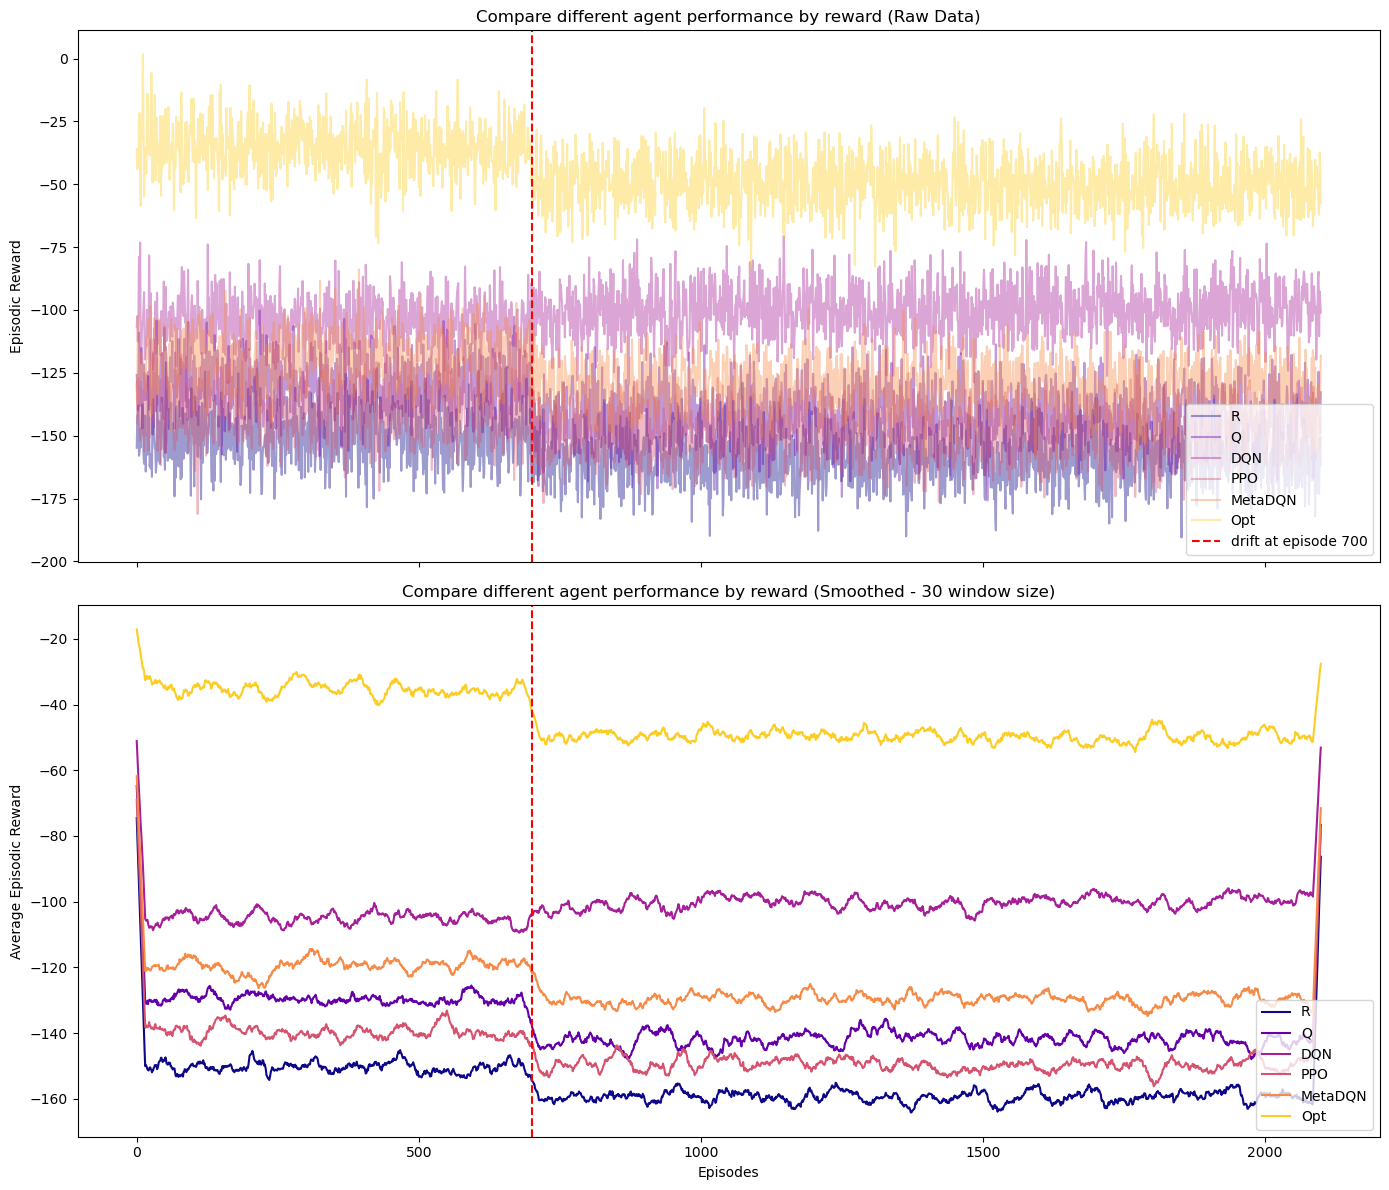

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Settings
episodes = 2100
window = 30
drift_point = 700

# Color mapping from original plot (assumed from line order in legend)
colors = cm.plasma(np.linspace(0, 0.9, 6))

# Synthetic base performance for agents (higher is better)
base_rewards = {
    'R': -150,
    'Q': -130,
    'DQN': -105,
    'PPO': -140,
    'MetaDQN': -120,
    'Opt': -35,
}

# Drift impact (Opt unaffected)
drift_impact = {
    'R': -10,
    'Q': -12,
    'DQN': 5,
    'PPO': -10,
    'MetaDQN': -10,
    'Opt': -3,
}

# Create synthetic reward trajectories
rewards = {}
for agent, base in base_rewards.items():
    noise = np.random.normal(0, 10, episodes)
    reward = np.full(episodes, base) + noise
    reward[drift_point:] += drift_impact[agent]
    # Smooth
    smooth = np.convolve(reward, np.ones(window)/window, mode='same')
    rewards[agent] = (reward, smooth)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Raw data
i=0
for agent, (raw, _) in rewards.items():
    ax1.plot(raw, label=agent, color=colors[i], alpha=0.4)
    i+=1
ax1.axvline(drift_point, color='red', linestyle='--', label='drift at episode 700')
ax1.set_title('Compare different agent performance by reward (Raw Data)')
ax1.set_ylabel('Episodic Reward')
ax1.legend(loc='lower right')

# Smoothed data
j=0
for agent, (_, smooth) in rewards.items():
    ax2.plot(smooth, label=agent, color=colors[j])
    j+=1
ax2.axvline(drift_point, color='red', linestyle='--')
ax2.set_title('Compare different agent performance by reward (Smoothed - 30 window size)')
ax2.set_ylabel('Average Episodic Reward')
ax2.set_xlabel('Episodes')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [9]:
from dyna_env_drifttype import TaskEnv_driftype

In [10]:
env = TaskEnv_driftype()

/Users/veetin/Desktop/drifttest_pa/main/dyna_env_drifttype.py:45: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  frequencies[label][action] = ast.literal_eval(frequencies[label][action]) #判断需要计算的内容是不是合法的Python类型，如果是则执行，否则就报错


In [13]:
type(env.observation_space['pp'])

pandas.core.series.Series

In [14]:
df_new = env.observation_space.copy()  # 复制原始DataFrame，以避免修改原始数据
df_new['pp'] = df_new['pp'].apply(lambda x: {k: round(v, 2) if isinstance(v, (int, float)) else v for k, v in x.items()})
# 将新的DataFrame保存到CSV文件
df_new.to_csv('processed_nodrift_data.csv', index=True)  # index=True 会保留行索引


In [17]:
env.reset()
env.set_flag()
env.drift(change_at_states=['pp'])


drift happen
change_frequencies function running


In [18]:
df_new = env.observation_space.copy()  # 复制原始DataFrame，以避免修改原始数据
df_new['pp'] = df_new['pp'].apply(lambda x: {k: round(v, 2) if isinstance(v, (int, float)) else v for k, v in x.items()})
# 将新的DataFrame保存到CSV文件
df_new.to_csv('processed_drift_data.csv', index=True)  # index=True 会保留行索引